In [1]:
import os
import json
from utils import get_colors

In [2]:
# loading data

from sorbetto.core.entity import Entity
from sorbetto.performance.two_class_classification import TwoClassClassificationPerformance

PATH_DATA = os.path.join(os.getcwd(), 'data', 'semantic_segmentation_methods.json')

MAP_DATASETS = {
    'Cityscapes': '♠',
    'ADE20K': '♥',
    'Pascal VOC 2012': '♦',
    'COCO-Stuff 164k': '♣'
}

def read_json(filePath:str):
    """
    Function to read json 
    """
    
    with open(filePath, 'r') as f:
        data = json.load(f)
    return data


def read_data(filePath:str = PATH_DATA):
    data = read_json(filePath)

    processed_data = []

    colors = get_colors(len(data))

    # convert each instance into an Entity
    for i, elem in enumerate(data):
        performance = TwoClassClassificationPerformance(
            ptp=elem['proba_tp'],
            ptn=elem['proba_tn'],
            pfp=elem['proba_fp'],
            pfn=elem['proba_fn']
        )

        entity = Entity(
            performance= performance,
            name = f"{elem['model']} {MAP_DATASETS[elem['learning_set']]}",
            color= colors[i]
        )

        processed_data.append(entity)

    return processed_data



data = read_data()

In [3]:
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.flavor.value_flavor import ValueFlavor
from sorbetto.flavor.entity_flavor import EntityFlavor
from sorbetto.flavor.ranking_flavor import RankingFlavor

parametrization = ParameterizationDefault()
valueFlavor = ValueFlavor()
entityFlavor = EntityFlavor()
rankingFlavor = RankingFlavor()


In [4]:
from sorbetto.tile.value_tile import ValueTile
from sorbetto.tile.entity_tile import EntityTile
from sorbetto.tile.ranking_tile import RankingTile

id = 8
print(data[id])

v_tile = ValueTile(parameterization=parametrization,
                   flavor = valueFlavor,
                   performance = data[id].performance,
                   name = "Value Tile")

e_tile = EntityTile(parameterization=parametrization,
                    rank = 2,
                   flavor=entityFlavor,
                   entities_list=data,
                   name="Entity Tile")

r_tile = RankingTile(parameterization=parametrization,
                     flavor=rankingFlavor,
                     entities_list=data,
                     entity_id=58,
                     name="Ranking Tile")


Entity `CCNet ♠` with performance 
 TwoClassClassificationPerformance(name=Two class P, ptn=0.7895523370746825, pfp=0.08622071940177178, pfn=0.018996378060251253, ptp=0.10523056546329451)


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Value Tile'}, xlabel='a(I)', ylabel='b(I)'>)

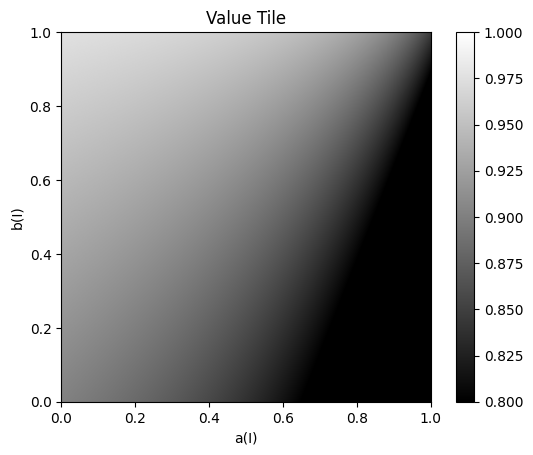

In [5]:
v_tile.draw()

In [6]:
p = e_tile.performance

In [7]:
import numpy as np

a = np.linspace(0, 1, 1000)
b = np.linspace(0, 1, 1000)

a2, b2 = np.meshgrid(a, b, indexing='xy')

res = e_tile(a2, b2)

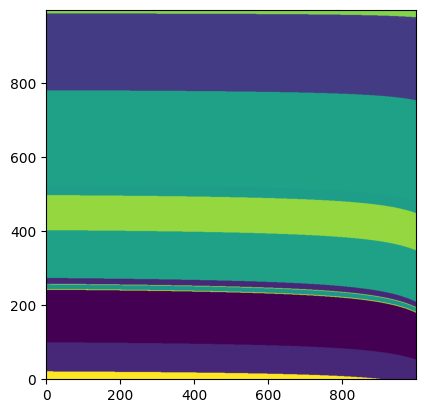

In [8]:
import matplotlib.pyplot as plt

plt.imshow(res, origin='lower')

In [9]:
print(e_tile.flavor.nb_entities)

74


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Entity Tile'}, xlabel='a(I)', ylabel='b(I)'>)

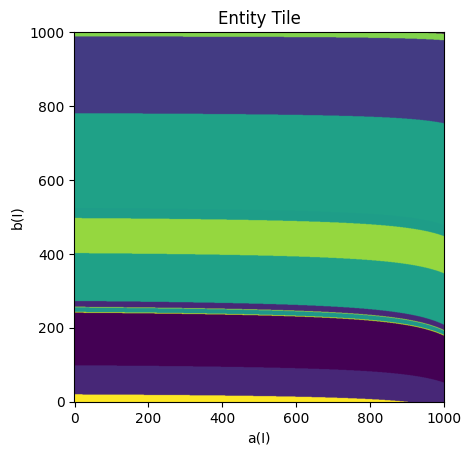

In [10]:
e_tile.draw(None, None)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Ranking Tile'}, xlabel='a(I)', ylabel='b(I)'>)

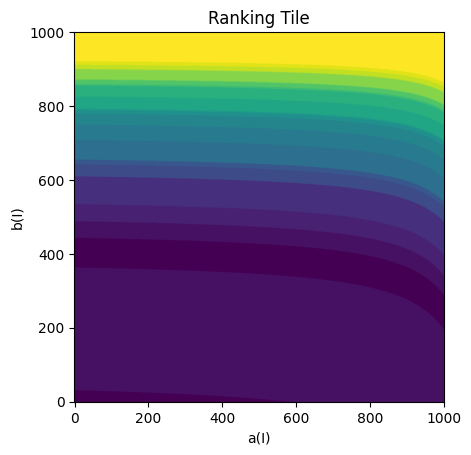

In [11]:
r_tile.draw()